# **Description**


---


In this notebook I'm use a PyTorch-implemented Gradient-weighted Class Activation Heatmap (Grad-CAM) for class activation exploration. 

I'l be using a fine-tuned MobileNetV2 (on Stanford Cars Dataset) as a model and torchcam as a Grad-CAM implementation.


In [2]:
# Load dependies 

import os 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


from torchvision import models
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image

In [9]:
SAMPLES_PATH = "samples/"

In [4]:
!pip install torchcam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 10.4 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
# Defining the model

model = models.mobilenet_v2()
model.classifier[1] = nn.Linear(in_features=model.classifier[1].in_features, out_features=196)
model.load_state_dict(torch.load("/content/mob_netv2.pth"))

<All keys matched successfully>

In [7]:
from torchcam.methods import SmoothGradCAMpp
from torchcam.utils import overlay_mask

# Create CAM extractor

cam_extractor = SmoothGradCAMpp(model.eval())

In [10]:
samples = []
labels = []

for im in os.listdir(SAMPLES_PATH):
  samples.append(SAMPLES_PATH + im)
  labels.append(im.split(".")[0])

# **Grad-CAM visualization**

---



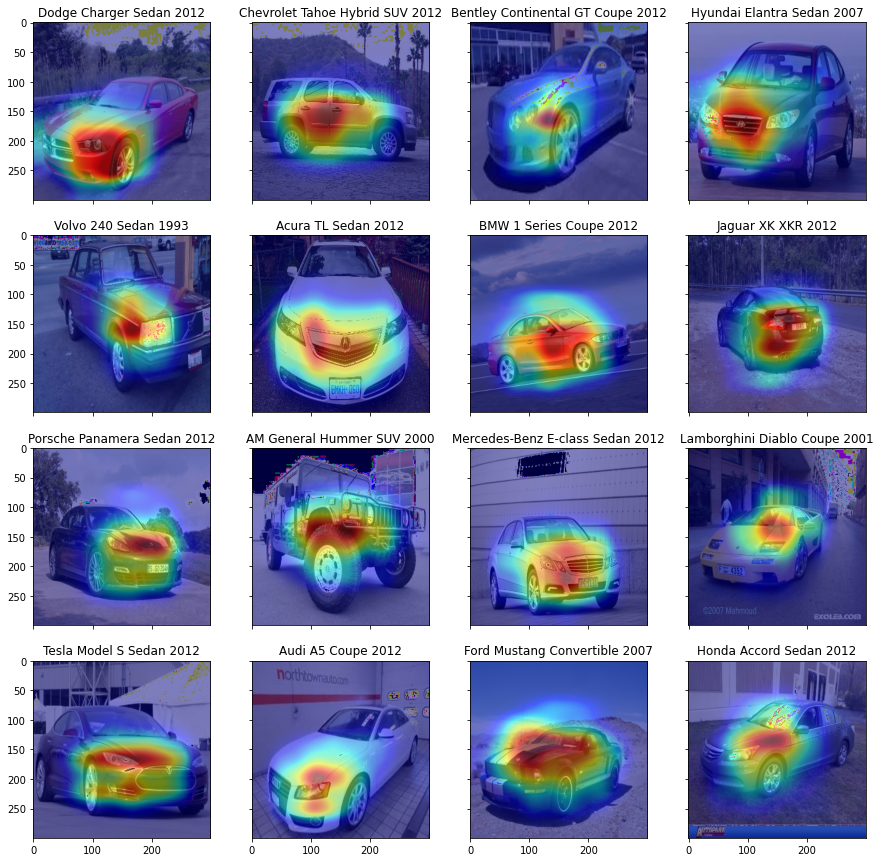

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(15, 15), \
                        sharey=True, sharex=True)

# Plot Grad-CAM for each sample

for index, fig_x  in enumerate(ax.flatten()):

    random_characters = int(np.random.uniform(0, len(samples)))
    image = read_image(samples[index])
    label = labels[index]
    input_tensor = normalize(resize(image, (300, 300)) / 255., [1, 1, 1], [1, 1, 1])
    out = model(input_tensor.unsqueeze(0))
    
    cam = cam_extractor(out.squeeze(0).argmax().item(), out)
    result = overlay_mask(to_pil_image(input_tensor), to_pil_image(cam[0], mode = "F"), alpha=0.5)
    fig_x.imshow(result)
    fig_x.set_title(label)
